#### CREDIT RISK ANALYSIS USING RANDOM FOREST MODELLING 

In [78]:
#imports

import numpy as np
import pandas as pd
import seaborn as sns

In [79]:
#importing the csv file as pandas dataframe
df = pd.read_csv("./credit_risk_dataset.csv")

In [80]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [81]:
#checking NaN values
df.isna().sum()
print(df.shape)

(32581, 12)


In [82]:
#removing NaNs
df_nonan = df.dropna()
# print(df_nonan.shape)
df_nonan.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [83]:
#checing for null values
df_nonan.isnull().sum()
df_nonan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [84]:
#checking for outliers and improper data in emp_length

df_nonan['person_emp_length'] = df_nonan['person_emp_length'].apply(lambda x: int(x) if not isinstance(x, int) else x)

df_nonan = df_nonan[(df_nonan['person_emp_length'] < 100) & (df_nonan['person_emp_length'] < df_nonan['person_age'])]
    
df_nonan

C:\Users\Pensalwar\AppData\Local\Temp\ipykernel_66704\2752505952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonan['person_emp_length'] = df_nonan['person_emp_length'].apply(lambda x: int(x) if not isinstance(x, int) else x)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5,PERSONAL,B,15000,11.48,0,0.10,N,26


In [85]:
#one hot encoding the home owenership 
# print(df_nonan['person_home_ownership'].unique())


mapping = {
    'OWN': 2,
    'RENT': 1,
    'MORTGAGE': 0,
    'OTHER': -1  # or any other suitable value
}


df_nonan['person_home_ownership'] = df_nonan['person_home_ownership'].str.strip().str.upper()
df_nonan['person_home_ownership'] = df_nonan['person_home_ownership'].map(mapping)
df_nonan

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,2,5,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,0,1,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,1,4,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,1,8,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,2,2,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,0,4,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,1,3,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,0,5,PERSONAL,B,15000,11.48,0,0.10,N,26


In [86]:
# df_nonan['cb_person_default_on_file'].value_counts()
df_nonan.drop('loan_intent', axis=1, inplace=True)

In [87]:
mapping_loan_grade = {
    'A': 7,
    'B': 6,
    'C': 5,
    'D': 4,
    'E': 3,
    'F': 2,
    'G': 1
}

df_nonan['loan_grade'] = df_nonan['loan_grade'].str.strip().str.upper()
df_nonan['loan_grade'] = df_nonan['loan_grade'].map(mapping_loan_grade)
df_nonan
# df_nonan['loan_grade'].value_counts()

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,2,5,6,1000,11.14,0,0.10,N,2
2,25,9600,0,1,5,5500,12.87,1,0.57,N,3
3,23,65500,1,4,5,35000,15.23,1,0.53,N,2
4,24,54400,1,8,5,35000,14.27,1,0.55,Y,4
5,21,9900,2,2,7,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1,5,5800,13.16,0,0.11,N,30
32577,54,120000,0,4,7,17625,7.49,0,0.15,N,19
32578,65,76000,1,3,6,35000,10.99,1,0.46,N,28
32579,56,150000,0,5,6,15000,11.48,0,0.10,N,26


In [88]:
mapping_cb_person_default_on_file = {
    'Y': 1,
    'N': 0
}

df_nonan['cb_person_default_on_file'] = df_nonan['cb_person_default_on_file'].str.strip().str.upper()
df_nonan['cb_person_default_on_file'] = df_nonan['cb_person_default_on_file'].map(mapping_cb_person_default_on_file)
df_nonan
# df_nonan['loan_grade'].value_counts()

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,2,5,6,1000,11.14,0,0.10,0,2
2,25,9600,0,1,5,5500,12.87,1,0.57,0,3
3,23,65500,1,4,5,35000,15.23,1,0.53,0,2
4,24,54400,1,8,5,35000,14.27,1,0.55,1,4
5,21,9900,2,2,7,2500,7.14,1,0.25,0,2
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1,5,5800,13.16,0,0.11,0,30
32577,54,120000,0,4,7,17625,7.49,0,0.15,0,19
32578,65,76000,1,3,6,35000,10.99,1,0.46,0,28
32579,56,150000,0,5,6,15000,11.48,0,0.10,0,26


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
X = df_nonan.drop('loan_status', axis=1) 
y = df_nonan['loan_status']              

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [92]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      6730
           1       0.90      0.66      0.76      1861

    accuracy                           0.91      8591
   macro avg       0.91      0.82      0.85      8591
weighted avg       0.91      0.91      0.90      8591



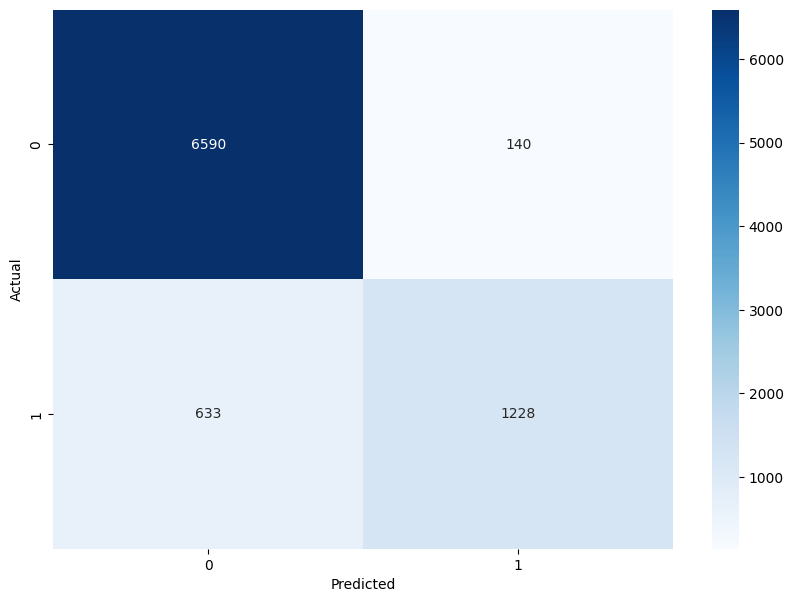

Accuracy: 0.91


In [93]:
y_pred = rf_model.predict(X_test)


print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)


# Ploting confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


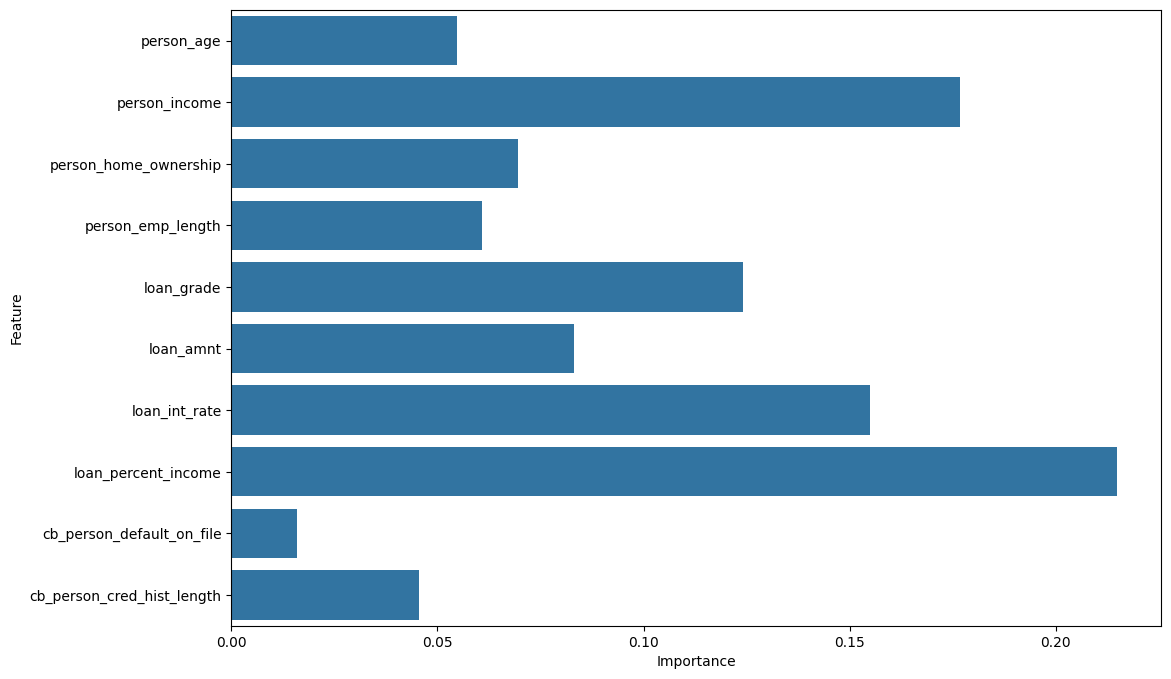

In [94]:
#checking feature importance

feature_importances = rf_model.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Ploting feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.show()